<a href="https://colab.research.google.com/github/HarithraR/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Assuming your dataset is in a CSV file named 'data.csv' in your Google Drive
file_path = '/content/drive/MyDrive/Placement/Data/archive/car_data.csv'
df = pd.read_csv(file_path)

In [ ]:
print(df.head())
print(df.tail())

   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0
     User ID  Gender  Age  AnnualSalary  Purchased
995      863    Male   38         59000          0
996      800  Female   47         23500          0
997      407  Female   28        138500          1
998      299  Female   48        134000          1
999      687  Female   44         73500          0


In [ ]:
print(df.describe())

           User ID          Age   AnnualSalary    Purchased
count  1000.000000  1000.000000    1000.000000  1000.000000
mean    500.500000    40.106000   72689.000000     0.402000
std     288.819436    10.707073   34488.341867     0.490547
min       1.000000    18.000000   15000.000000     0.000000
25%     250.750000    32.000000   46375.000000     0.000000
50%     500.500000    40.000000   72000.000000     0.000000
75%     750.250000    48.000000   90000.000000     1.000000
max    1000.000000    63.000000  152500.000000     1.000000


In [ ]:
print(df.shape)
df.nunique()

(1000, 5)


User ID         1000
Gender             2
Age               46
AnnualSalary     247
Purchased          2
dtype: int64

In [ ]:
# Step 1: Remove null values
df = df.dropna()

# Step 2: Remove duplicates
df = df.drop_duplicates()
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

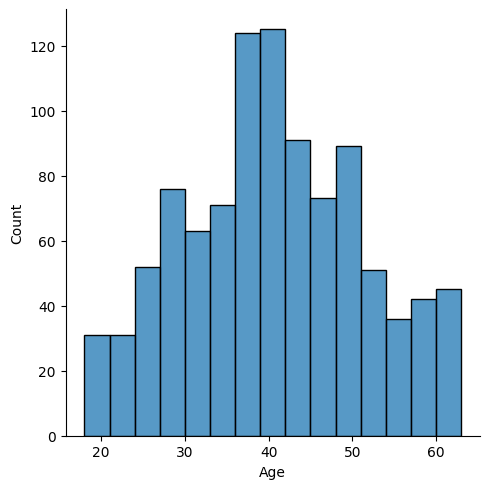

In [ ]:
import seaborn as sns
sns.displot(df['Age'])

<ipython-input-8-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

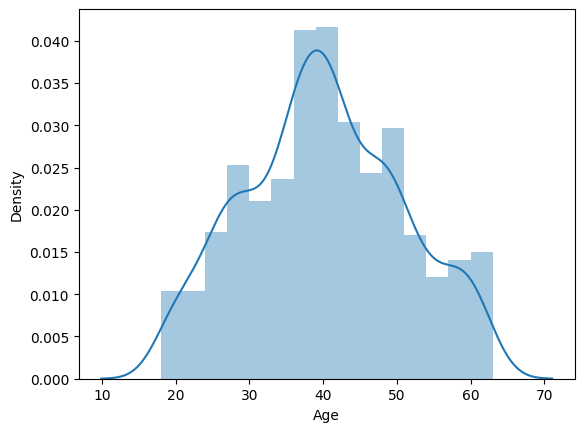

In [ ]:
sns.distplot(df['Age'])

<Axes: xlabel='Gender', ylabel='AnnualSalary'>

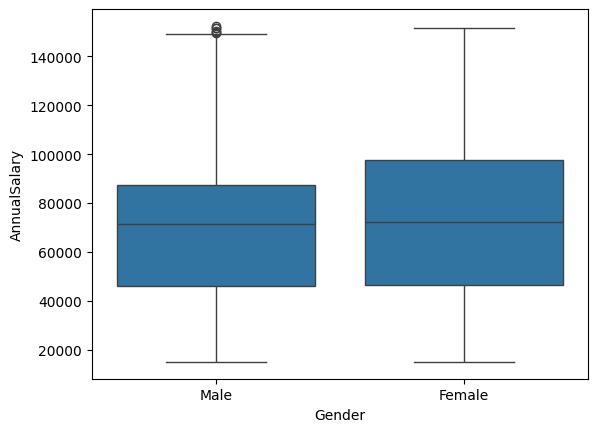

In [ ]:
sns.boxplot(x='Gender',y='AnnualSalary',data=df)

In [ ]:

# Calculate Q1 and Q3 for each gender group
Q1 = df.groupby('Gender')['AnnualSalary'].quantile(0.25)
Q3 = df.groupby('Gender')['AnnualSalary'].quantile(0.75)

# Calculate IQR for each gender group
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_n = df.groupby('Gender').apply(lambda x: x[(x['AnnualSalary'] >= lower_bound[x.name]) & (x['AnnualSalary'] <= upper_bound[x.name])]).reset_index(drop=True)
print(df_n.head())

   User ID  Gender  Age  AnnualSalary  Purchased
0      846  Female   47         33500          1
1      219  Female   46        132500          1
2       85  Female   30         84500          0
3      790  Female   32         72500          0
4      116  Female   27         57000          0


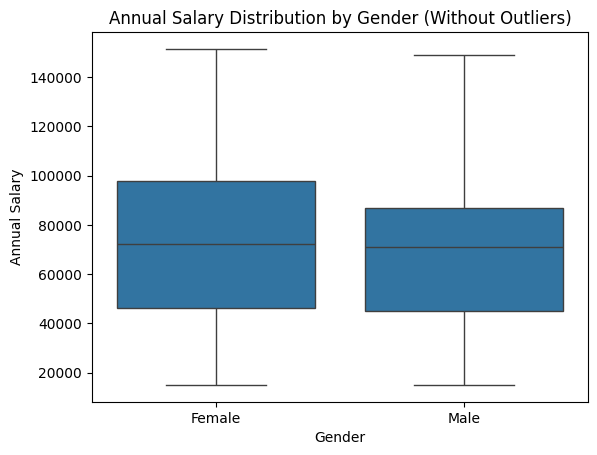

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_no_outliers' is your DataFrame after removing outliers
sns.boxplot(x='Gender', y='AnnualSalary', data=df_n)
plt.title('Annual Salary Distribution by Gender (Without Outliers)')
plt.xlabel('Gender')
plt.ylabel('Annual Salary')
plt.show()


In [ ]:
corr = df_n.corr()
print(corr)

               User ID       Age  AnnualSalary  Purchased
User ID       1.000000  0.018713      0.003444   0.014261
Age           0.018713  1.000000      0.160956   0.616311
AnnualSalary  0.003444  0.160956      1.000000   0.355410
Purchased     0.014261  0.616311      0.355410   1.000000


<ipython-input-8-b22d74c0e6fe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_n.corr()


<Axes: >

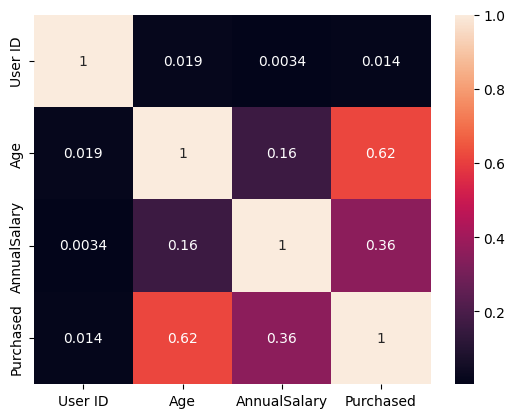

In [ ]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

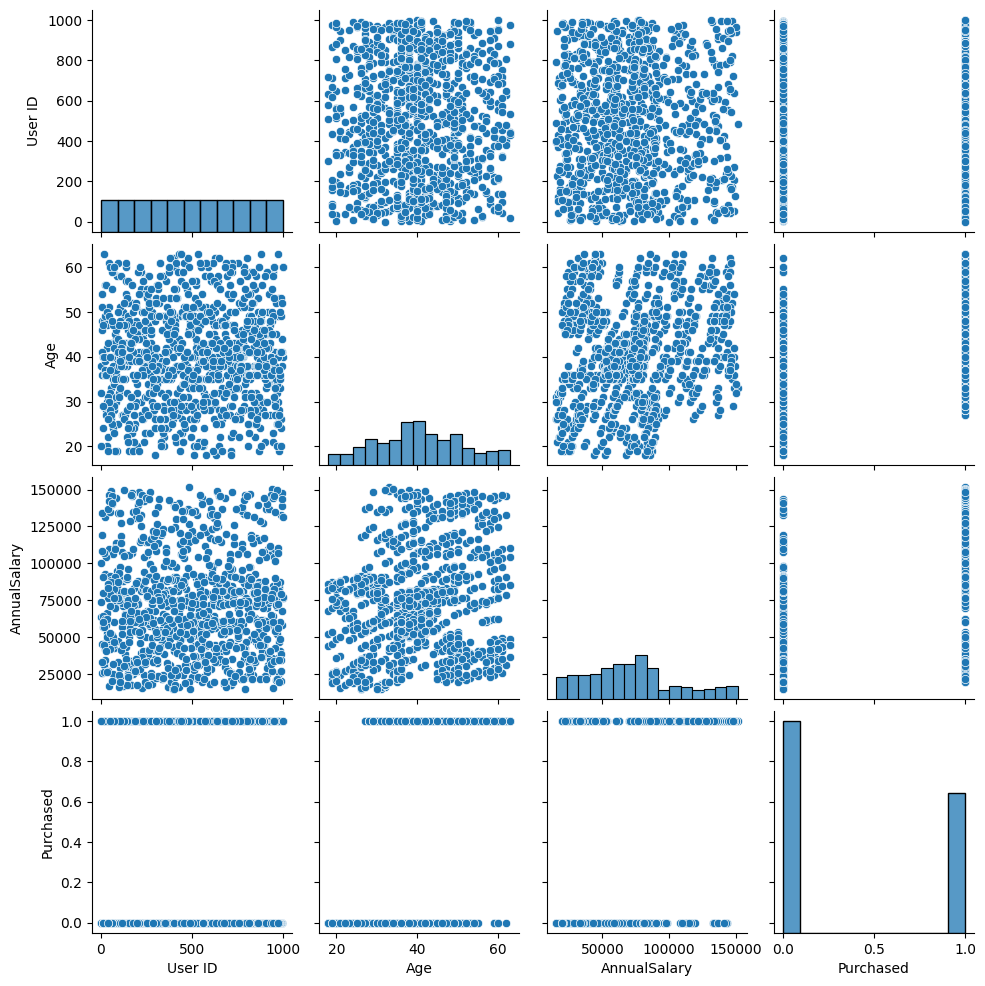

In [ ]:
sns.pairplot(df_n)

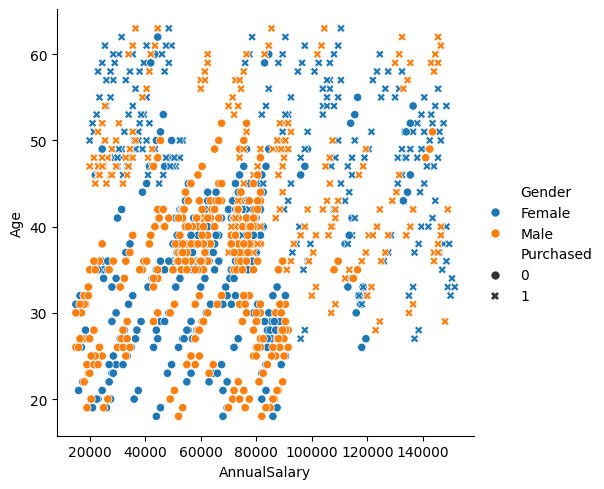

In [ ]:
sns.relplot(x='AnnualSalary', y='Age', hue='Gender',style='Purchased', data=df_n)

In [ ]:
d = pd.get_dummies(df_n['Gender'])

d_n = pd.concat([df_n, d], axis=1)

d_n.drop('Gender', axis=1, inplace=True)

print(d_n.head())

d_n.drop('Male', axis=1, inplace=True)

print(d_n.head())

   User ID  Age  AnnualSalary  Purchased  Female  Male
0      846   47         33500          1       1     0
1      219   46        132500          1       1     0
2       85   30         84500          0       1     0
3      790   32         72500          0       1     0
4      116   27         57000          0       1     0
   User ID  Age  AnnualSalary  Purchased  Female
0      846   47         33500          1       1
1      219   46        132500          1       1
2       85   30         84500          0       1
3      790   32         72500          0       1
4      116   27         57000          0       1
